In [9]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential,Model
from keras import layers
from keras.utils import to_categorical

from sklearn.datasets import make_gaussian_quantiles

%matplotlib inline

# data generation

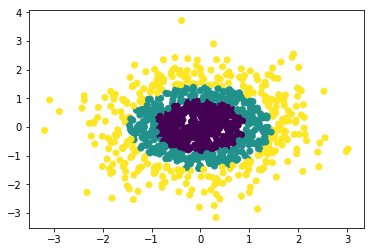

In [10]:
X, Y = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
Y_label=to_categorical(Y)

# build a neural network

In [11]:
nn=Sequential()
nn.add(layers.Dense(20,activation='relu',input_shape=(2,),name='hid1'))
nn.add(layers.Dense(10,activation='relu',name='hid2'))
nn.add(layers.Dense(5,activation='relu',name='hid3'))
nn.add(layers.Dense(2,activation='relu',name='hid4'))
nn.add(layers.Dense(3,activation='softmax',name='output'))
nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hid1 (Dense)                 (None, 20)                60        
_________________________________________________________________
hid2 (Dense)                 (None, 10)                210       
_________________________________________________________________
hid3 (Dense)                 (None, 5)                 55        
_________________________________________________________________
hid4 (Dense)                 (None, 2)                 12        
_________________________________________________________________
output (Dense)               (None, 3)                 9         
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [13]:
nn.fit(X,Y_label,epochs=30,batch_size=32,validation_split=.1)

Train on 900 samples, validate on 100 samples
Epoch 1/30
900/900 [==============================] - 0s 434us/step - loss: 1.0953 - acc: 0.5389 - val_loss: 1.0995 - val_acc: 0.4200
Epoch 2/30
900/900 [==============================] - 0s 47us/step - loss: 1.0877 - acc: 0.5322 - val_loss: 1.0902 - val_acc: 0.6100
Epoch 3/30
900/900 [==============================] - 0s 53us/step - loss: 1.0722 - acc: 0.6567 - val_loss: 1.0753 - val_acc: 0.6700
Epoch 4/30
900/900 [==============================] - 0s 45us/step - loss: 1.0519 - acc: 0.6656 - val_loss: 1.0597 - val_acc: 0.6700
Epoch 5/30
900/900 [==============================] - 0s 46us/step - loss: 1.0245 - acc: 0.6678 - val_loss: 1.0314 - val_acc: 0.6700
Epoch 6/30
900/900 [==============================] - 0s 41us/step - loss: 0.9895 - acc: 0.6700 - val_loss: 0.9971 - val_acc: 0.6700
Epoch 7/30
900/900 [==============================] - 0s 46us/step - loss: 0.9438 - acc: 0.6667 - val_loss: 0.9465 - val_acc: 0.6700
Epoch 8/30
900/900 [==

# get output of hid4

In [14]:
nn_hid4=Model(nn.input,outputs=nn.get_layer('hid4').output)

In [15]:
hid4_output=nn_hid4.predict(X)

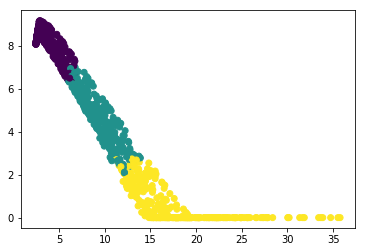

In [16]:
plt.scatter(hid4_output[:, 0], hid4_output[:, 1], marker='o', c=Y)